## 作業

1. 如何使用已經訓練好的模型？
2. 依照 https://github.com/qqwweee/keras-yolo3 的程式碼，請敘述，訓練模型時，資料集的格式是什麼？具體一點的說，要提供什麼格式的文件來描述資料集的圖片以及 bboxes 的信息呢？

2A:  
訓練時需提供資料集標註檔案train.txt & val.txt文件  
文件內容格式為: imgPath x1 y1 x2 y2 classID  
ex:  ./VOCdevkit/VOC2007/JPEGImages/000007.jpg 141,50,500,330,6  

In [1]:
#%tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
import tensorflow as tf
print(tf.__version__)

1.10.0


In [2]:
#pip install keras==2.2.4 # 需要安裝 keras 2.2.4 的版本

In [3]:
#from google.colab import drive 
#drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# 下載基於 keras 的 yolov3 程式碼
#%cd 'gdrive/My Drive'
# !git clone https://github.com/qqwweee/keras-yolo3 # 如果之前已經下載過就可以註解掉
#%cd keras-yolo3

In [4]:
from PIL import Image
image = Image.open('dog.jpg') 

In [5]:
from keras_yolo3.yolo import YOLO

modelPath = 'keras_yolo3/logs/000/trained_weights_final.h5'
classes_path = 'keras_yolo3/model_data/voc_classes.txt'
anchors_path = 'keras_yolo3/model_data/yolo_anchors.txt'

print("modelPath:",modelPath)
print("classPath:",classes_path)
print("anchorsPath:",anchors_path)

#load yolo model
yolo_model = YOLO(model_path=modelPath, classes_path=classes_path, anchors_path=anchors_path)

Using TensorFlow backend.


modelPath: keras_yolo3/logs/000/trained_weights_final.h5
classPath: keras_yolo3/model_data/voc_classes.txt
anchorsPath: keras_yolo3/model_data/yolo_anchors.txt
[DEBUG]anchors_path: keras_yolo3/model_data/yolo_anchors.txt
keras_yolo3/logs/000/trained_weights_final.h5 model, anchors, and classes loaded.


In [6]:
#inference
r_image = yolo_model.detect_image(image)

(416, 416, 3)
Found 3 boxes for img
tvmonitor 0.36 (0, 0) (103, 250)
car 0.55 (497, 84) (651, 186)
bicycle 0.72 (166, 174) (571, 377)
2.1005299


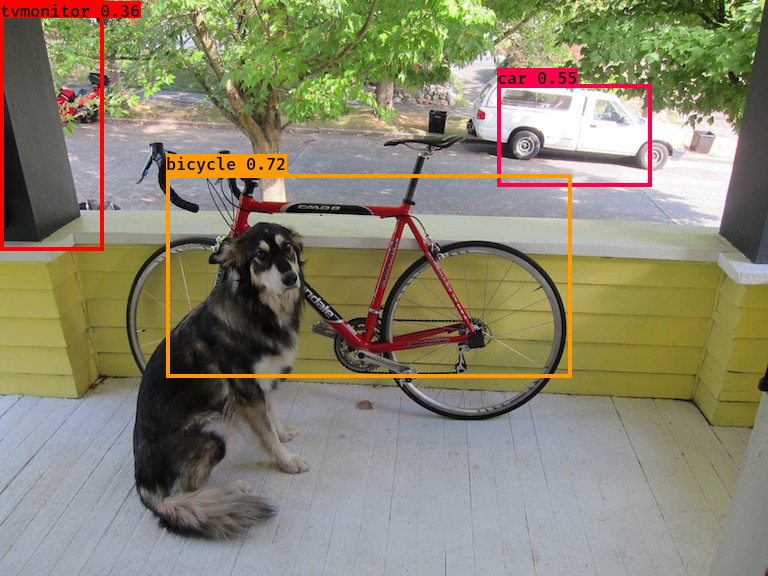

In [7]:
r_image